An example of using the plasticc light curves to put lots of transients around a DDF location.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
from mafContrib import Plasticc_metric, plasticc_slicer, load_plasticc_lc
from lsst.sims.utils import _healbin
import healpy as hp
from lsst.sims.featureScheduler.surveys import generate_dd_surveys


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
runName = 'baseline_1exp_pairsmix_10yrs'
#runName = 'roll_mod3_sdf0.20mixed_10yrs'
#runName = 'very_alt3_rm5illum20_10yrs'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
ddf_surveys = generate_dd_surveys()
survey = ddf_surveys[0]

In [4]:
ddf_surveys[0].survey_name

'DD:ELAISS1'

In [5]:
models = ['SNIa-normal']
plasticc_models_dict = {}
for model in models:
    plasticc_models_dict[model] = list(load_plasticc_lc(model=model).values())

In [6]:
bundleList = []
slicer1 = plasticc_slicer(plcs=plasticc_models_dict['SNIa-normal'], seed=42,
                                         ra_cen=survey.ra, dec_cen=survey.dec, radius=np.radians(5.))
metric = Plasticc_metric(metricName=survey.survey_name+' SNIa')
sql = ''
summary_stats = [metrics.MeanMetric(maskVal=0)]
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer1, sql, runName=runName, summaryMetrics=summary_stats,
                         plotFuncs=plotFuncs)
bundleList.append(bundle)


# For comparison, let's look at 0,0
slicer2 = plasticc_slicer(plcs=plasticc_models_dict['SNIa-normal'], seed=42,
                                         ra_cen=0, dec_cen=0, radius=np.radians(5.))
metric = Plasticc_metric(metricName=survey.survey_name+' zz, SNIa')
sql = ''
summary_stats = [metrics.MeanMetric(maskVal=0)]
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer2, sql, runName=runName, summaryMetrics=summary_stats,
                         plotFuncs=plotFuncs)
bundleList.append(bundle)


In [7]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD', 'fiveSigmaDepth', 'filter'].
Found 2609253 visits
Running:  ['baseline_1exp_pairsmix_10yrs_DD_ELAISS1_SNIa_USER']


/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/plasticcMetrics.py:110: RuntimeWarning: invalid value encountered in log10
  result[infilt] = -2.5*np.log10(result[infilt]) + zp
/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/plasticcMetrics.py:250: RuntimeWarning: invalid value encountered in less
  above_limit = np.where(full_lc < self.rmag_limit)


Completed metric generation.
Running:  ['baseline_1exp_pairsmix_10yrs_DD_ELAISS1_zz_SNIa_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.


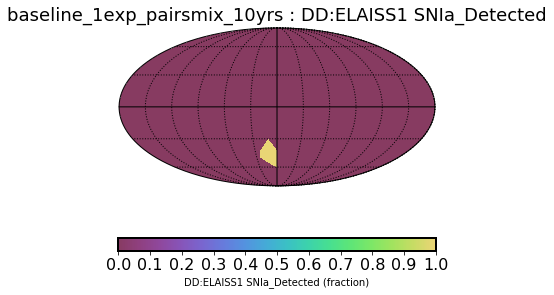

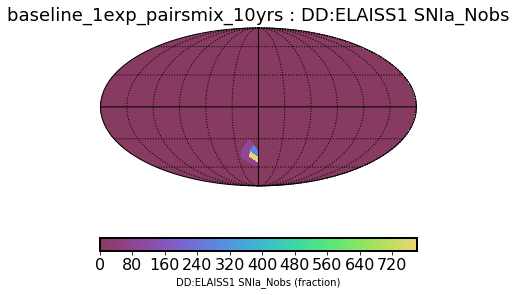

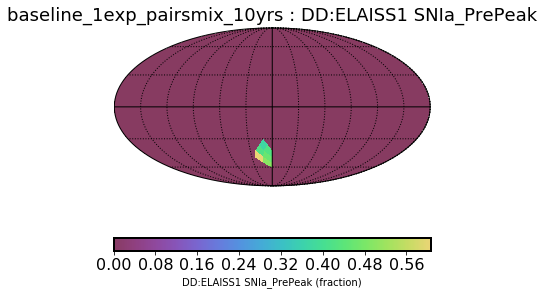

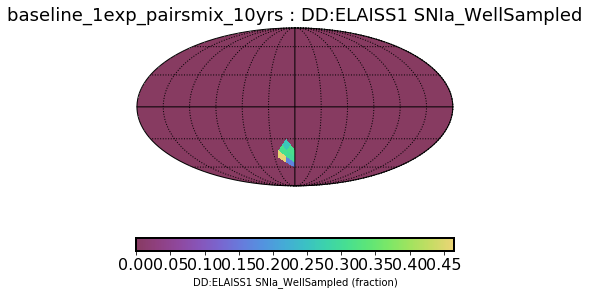

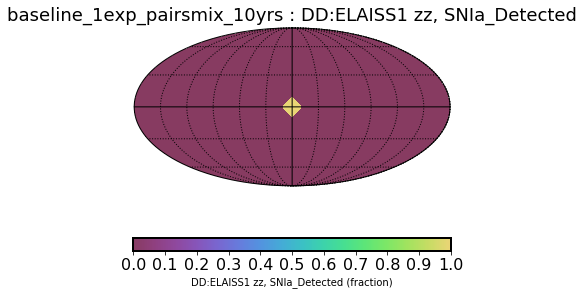

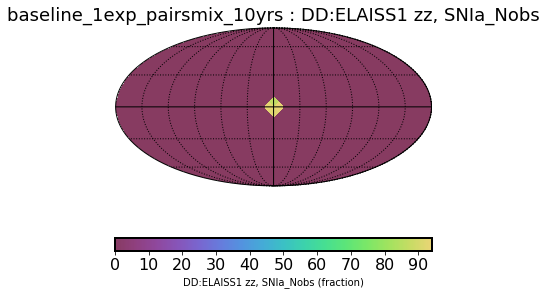

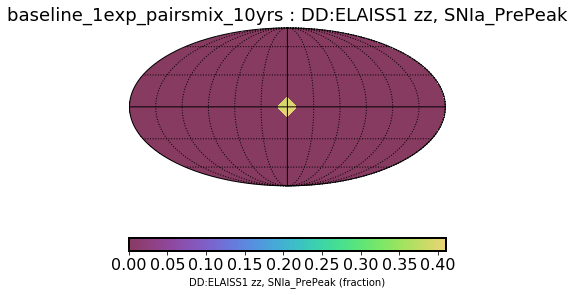

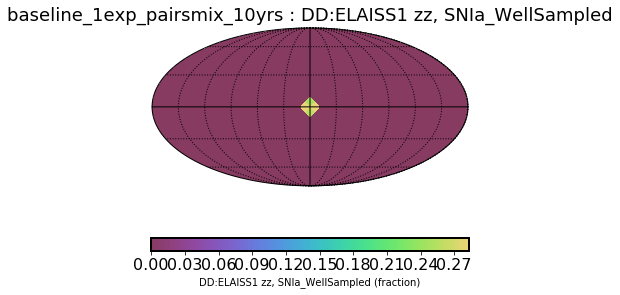

In [8]:
bgroup.plotAll(closefigs=False)

In [9]:
# bundleDict['DD:ELAISS1 SNIa_WellSampled'].metricValues
nside = 256
data = _healbin(slicer1.slicePoints['ra'], slicer1.slicePoints['dec'],
                                   bundleDict['DD:ELAISS1 SNIa_WellSampled'].metricValues, nside=nside,
                                   reduceFunc=np.mean, fillVal=slicer1.badval)

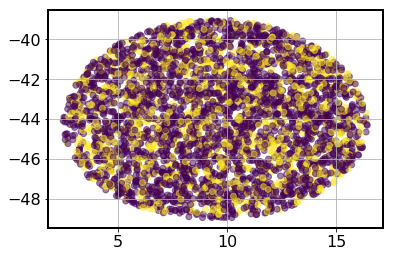

In [10]:
plt.scatter(np.degrees(slicer1.slicePoints['ra']), np.degrees(slicer1.slicePoints['dec']), alpha=.5,c=bundleDict['DD:ELAISS1 SNIa_WellSampled'].metricValues)

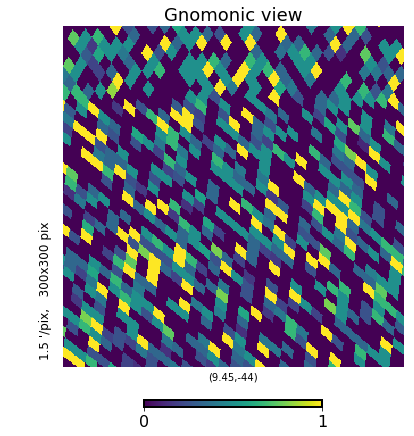

In [11]:
rot = (np.degrees(survey.ra), np.degrees(survey.dec))
hp.gnomview(data, rot=rot, xsize=300, ysize=300)

In [12]:
for key in bundleDict:
    if 'DD:' in key:
        print(key, bundleDict[key].summaryValues)

DD:ELAISS1 SNIa_Detected {'Mean': 1.0}
DD:ELAISS1 SNIa_Nobs {'Mean': 402.63225}
DD:ELAISS1 SNIa_PrePeak {'Mean': 0.4375}
DD:ELAISS1 SNIa_WellSampled {'Mean': 0.30649999999999999}
DD:ELAISS1 zz, SNIa_Detected {'Mean': 0.99950000000000006}
DD:ELAISS1 zz, SNIa_Nobs {'Mean': 91.583500000000001}
DD:ELAISS1 zz, SNIa_PrePeak {'Mean': 0.40175}
DD:ELAISS1 zz, SNIa_WellSampled {'Mean': 0.26774999999999999}


(0, 20)

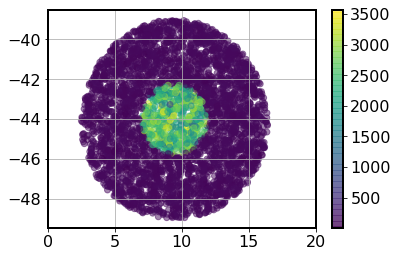

In [13]:
# Plot the number of observations that each SN gets around a DDF
plt.scatter(np.degrees(slicer1.slicePoints['ra']), np.degrees(slicer1.slicePoints['dec']), 
            alpha=.5,c=bundleDict['DD:ELAISS1 SNIa_Nobs'].metricValues)
cb=plt.colorbar()
plt.xlim([0,20])

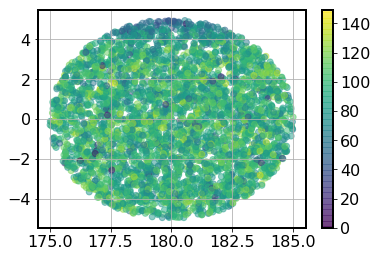

In [14]:
# Plot the number of observations that each SN gets around a point in the WFD
plt.scatter((np.degrees(slicer2.slicePoints['ra'])+180) % 360, np.degrees(slicer2.slicePoints['dec']), 
            alpha=.5,c=bundleDict['DD:ELAISS1 zz, SNIa_Nobs'].metricValues)
cb=plt.colorbar()